For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



In [3]:
import pandas as pd

In [6]:
titanic = pd.read_csv("C:/Users/KajalMittal/OneDrive - Langara College/Documents/Telephonic Reimbursement/Langara/Computing for Data Analytics - TR - 430 PM - 620 PM/Assignments/Assignment3/titanic.csv")

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Determine if the survival rate is associated to the class of passenger

In [64]:
first_class_passengers = (titanic['Pclass']==1).sum()
second_class_passengers = (titanic['Pclass']==2).sum()
third_class_passengers = (titanic['Pclass']==3).sum()
total_passengers = (titanic['Pclass']).count()

percent_first_class = first_class_passengers / total_passengers * 100
percent_second_class = second_class_passengers / total_passengers * 100
percent_third_class = third_class_passengers / total_passengers * 100

print('First class passengers percentage = ', percent_first_class, ' | Count: ', first_class_passengers)
print('Second class passengers percentage = ', percent_second_class, ' | Count: ', second_class_passengers)
print('Third class passengers percentage = ', percent_third_class, ' | Count: ', third_class_passengers)

total_survivor_count = titanic['Survived'].sum()
survived_groupedByClass = titanic.groupby('Pclass')
count_byClass = survived_groupedByClass['Survived'].sum()
survival_rate = count_byClass  / total_survivor_count * 100
print('Survival rates = ', survival_rate, ' | Count: ', count_byClass)

First class passengers percentage =  24.242424242424242  | Count:  216
Second class passengers percentage =  20.65095398428732  | Count:  184
Third class passengers percentage =  55.106621773288445  | Count:  491
Survival rates =  Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64  | Count:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [171]:
def get_counts(dataframe, criteria, colValues, Survivalstatus):
    """
    Counts method takes 4 parametes
    dataframe: the dataframe on which to work upon (titanic dataframe)
    criteria: take different columns like, Pclass, Gender
    colValues: takes different values of analysis column
    Survivalstatus: should be boolean and 0 = death and 1 = Survived
    returns count as per the input parameters
    """
  
    target = dataframe[criteria].where(dataframe[criteria] == colValues)
    class_count = target.where(dataframe['Survived'] == Survivalstatus).count()
    return class_count

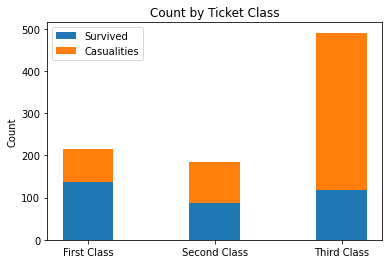

In [173]:
import matplotlib.pyplot as plt

class1_survival_count = get_counts(titanic, 'Pclass', 1, 1)
class2_survival_count = get_counts(titanic, 'Pclass', 2, 1)
class3_survival_count = get_counts(titanic, 'Pclass', 3, 1)
class1_death_count = get_counts(titanic, 'Pclass', 1, 0)
class2_death_count = get_counts(titanic, 'Pclass', 2, 0)
class3_death_count = get_counts(titanic, 'Pclass', 3, 0)

Pclass = ['First Class', 'Second Class', 'Third Class']
survival = [class1_survival_count, class2_survival_count, class3_survival_count]
casualities = [class1_death_count, class2_death_count, class3_death_count]

plt.bar(Pclass, survival, 0.4, label="Survived")
plt.bar(Pclass, casualities, 0.4, bottom = survival, label = "Casualities")
plt.ylabel("Count")
plt.title("Count by Ticket Class")
plt.legend()

In [146]:
#Performing chi-square test 
import scipy.stats as stats
stats.chisquare(titanic['Survived'], titanic['Pclass'])

Power_divergenceResult(statistic=1592.1666666666665, pvalue=2.0399395484622444e-42)

### Determine if the survival rate is associated to the gender

In [174]:
print('TOTAL COUNT BY GENDER')
total_female = (titanic['Sex']=='female').sum()
print("Females count:" ,total_female)

total_male = (titanic['Sex']=='male').sum()
print("Males count:" , total_male)

female_survival_count = get_counts(titanic, 'Sex', 'female', 1)
male_survival_count = get_counts(titanic, 'Sex', 'male', 1)
female_death_count = get_counts(titanic, 'Sex', 'female', 0)
male_death_count = get_counts(titanic, 'Sex', 'male', 0)

print('\nSURVIVAL COUNT BY GENDER')
print('Female survival count: ', female_survival_count)
print('Male survival count: ', male_survival_count)
print('\nCASUALTIES COUNT BY GENDER')
print('Female death count: ', female_death_count)
print('Male death count: ', male_death_count)


TOTAL COUNT BY GENDER
Females count: 314
Males count: 577

SURVIVAL COUNT BY GENDER
Female survival count:  233
Male survival count:  109

CASUALTIES COUNT BY GENDER
Female death count:  81
Male death count:  468


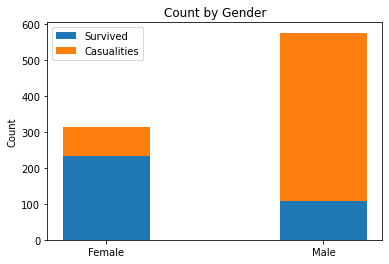

In [100]:
import matplotlib.pyplot as plt

Gender = ['Female', 'Male']
survival = [female_survival_count, male_survival_count]
casualities = [female_death_count, male_death_count]

plt.bar(Gender, survival, 0.4, label="Survived")
plt.bar(Gender, casualities, 0.4, bottom = survival, label = "Casualities")
plt.ylabel("Count")
plt.title("Count by Gender")
plt.legend()

In [103]:
#Using Spearman Coorelation to find out the relationship between Survival and Gender Variables

gender_df = titanic[['Sex', 'Survived']]
gender_df.replace(['male', 'female'], [0, 1], inplace=True) #replaced non-int values to the int values
gender_df[['Sex', 'Survived']].corr(method='spearman')

C:\Users\KajalMittal\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Sex,Survived
Sex,1.000000,0.543351
Survived,0.543351,1.000000


In [157]:
#Performing chi-square Analysis

contingency = pd.crosstab(titanic['Survived'], titanic['Sex'])
contingency
stats.chi2_contingency(contingency)


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

### Determine if the survival rate is associated to the age

In [110]:
#In age variable, we have 177 null values - first we need to clean our dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
titanic_cleaned = titanic[['Age', 'Survived']].dropna()
titanic_cleaned['Age'] = (np.floor(titanic_cleaned['Age'])).astype(int)  # rounded up the age for the ease of analysis

In [134]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       714 non-null    int32
 1   Survived  714 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 13.9 KB


In [176]:
ages_list = titanic_cleaned['Age'].unique()
ages_list.sort()
ages_list

ages_survival = pd.DataFrame(index=ages_list, columns=['Survived', 'Deaths', 'Total', 'Percentage'])

ages_survival['Survived'] = titanic_cleaned.groupby('Age')['Survived'].sum()
ages_survival['Total'] = titanic_cleaned.groupby('Age').count()
ages_survival['Deaths'] = ages_survival['Total'] - ages_survival['Survived']
ages_survival['Percentage'] = round(titanic_cleaned.groupby('Age')['Survived'].mean() * 100, 2)
ages_survival.head()

,Survived,Deaths,Total,Percentage
0,7,0,7,100.00
1,5,2,7,71.43
2,3,7,10,30.00
3,5,1,6,83.33
4,7,3,10,70.00


Text(0, 0.5, 'Percentage of survivors')

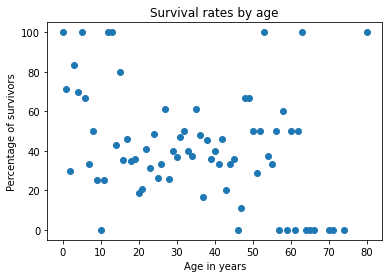

In [179]:
x = ages_survival['Percentage'].index
y = ages_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 